In [80]:
import pandas as pd # to load and manipulate data
import numpy as np # to work with vectors and matrices
import matplotlib.pyplot as plt # to plot the results
import matplotlib.image as mpimg # idem

In [81]:
data = pd.read_csv("data/train.csv")

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y = data.iloc[:, 0].values

X = data.iloc[:, 1:].values

X = X/255 # normalize the data, now they are beetwen [0, 1]

In [83]:
X[1, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Label:  8


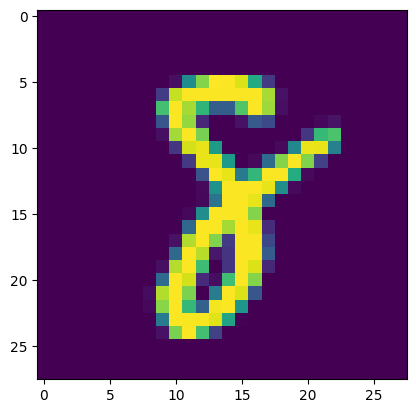

In [84]:
idx = 300
g = plt.imshow(X[idx].reshape(28,28)) 
print("Label: ", y[idx])

Label:  2


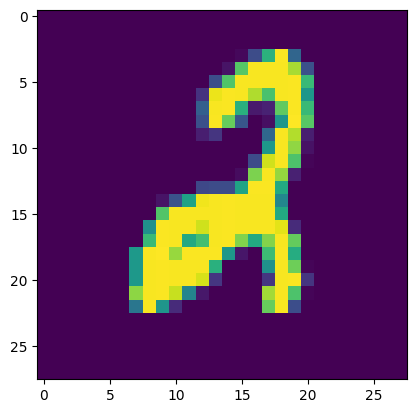

In [85]:
X_train = X[:1000, :]

y_train = y[:1000]

# now each row is a digit, we want to have each column as a digit
X_train = X_train.T

idx = 199
plt.imshow(X_train[:, idx].reshape(28,28))
print("Label: ", y[idx])

# Ok perfect!

## Let's begin

In [93]:
# initialize random weights in [-1, 1]
W = np.random.randn(10, X_train.shape[0])

# extract first vector from X_train
x1 = X_train[:, 0]

# create 1-hot encoding from y
Y = np.zeros((10, 1000))

for i in range(1000):
    Y[y[i], i] = 1

# now Y contains as columns the 1-hot encoding of y labels
y1 = Y[:, 0]

# let's begin 1 round of backpropagation
it = 1
max_it = 1000

alpha = 0.01

y1_hat = W.dot(x1)

delta = (y1_hat - y1)

err = np.mean(delta**2)

# print("y1_hat: ", y1_hat)
# print("err: ", err)

while it < max_it and err > 0.01:

    # do 1 full round 
    for i in range(1000):
        # extract current digit and current label
        x1 = X_train[:, i]
        y1 = Y[:, i]

        # calculate prediction
        y1_hat = W.dot(x1)

        delta = (y1_hat - y1)

        W_delta = delta.reshape((10,1)).dot(x1.reshape(1, 784))

        W = W - W_delta*alpha

    Y_hat = W.dot(X_train)

    Delta = Y_hat - Y

    err_vectors = np.mean(np.square(Delta), axis=0)

    # calculate mean error
    err = np.mean(err_vectors)

    # compute accuracy

    # Convert to abs values
    Y_hat_abs = np.abs(Y_hat)

    # extract max indices
    max_indices = np.argmax(Y_hat_abs, axis=0)

    Y_hat_zeros_ones = np.zeros(Y_hat_abs.shape)

    for i in range(1000):
        Y_hat_zeros_ones[max_indices[i], i] = 1.0

    # Step 1: Compare each column of Y and Y_hat to check if the positions of the 1s match
    matches = np.all(Y == Y_hat_zeros_ones, axis=0)

    # Step 2: Count the number of columns where the positions match
    correct_predictions = np.sum(matches)

    # Step 3: Divide by the total number of columns to get the accuracy
    total_predictions = Y.shape[1]
    accuracy = correct_predictions / total_predictions

    if it % 10 == 0:
        print("Iteration: ", it)
        print("Error: ", err)
        print("Accuracy: ", accuracy)
        print("-"*10)

    it += 1
   

Iteration:  10
Error:  0.9757889779434415
Accuracy:  0.15
----------
Iteration:  20
Error:  0.48182366051295367
Accuracy:  0.208
----------
Iteration:  30
Error:  0.3127206929365989
Accuracy:  0.302
----------
Iteration:  40
Error:  0.2349913303043837
Accuracy:  0.38
----------
Iteration:  50
Error:  0.19118219128785052
Accuracy:  0.448
----------
Iteration:  60
Error:  0.16291293984493438
Accuracy:  0.514
----------
Iteration:  70
Error:  0.1431151883965212
Accuracy:  0.568
----------
Iteration:  80
Error:  0.12853014978582517
Accuracy:  0.608
----------
Iteration:  90
Error:  0.11741352962441487
Accuracy:  0.644
----------
Iteration:  100
Error:  0.10872589038170186
Accuracy:  0.676
----------
Iteration:  110
Error:  0.10179985311913353
Accuracy:  0.7
----------
Iteration:  120
Error:  0.0961836847783791
Accuracy:  0.725
----------
Iteration:  130
Error:  0.09155969025353766
Accuracy:  0.745
----------
Iteration:  140
Error:  0.08769811961349666
Accuracy:  0.764
----------
Iteration:

Ok cool, 92.5% on the training set! Well, lets see how it works on the test set:

# Test accuracy...

In [92]:
X_test = X[1000:2000, :]

y_test = y[1000:2000]

# create 1-hot encoding from y
Y_test = np.zeros((10, 1000))

for i in range(1000):
    Y_test[y_test[i], i] = 1

idx = 333

# now each row is a digit, we want to have each column as a digit
X_test = X_test.T

# predict
Y_hat = W.dot(X_test)

# Convert to abs values
Y_hat_abs = np.abs(Y_hat)

# extract max indices
max_indices = np.argmax(Y_hat_abs, axis=0)

Y_hat_zeros_ones = np.zeros(Y_hat_abs.shape)

for i in range(1000):
    Y_hat_zeros_ones[max_indices[i], i] = 1.0

# Step 1: Compare each column of Y and Y_hat to check if the positions of the 1s match
matches = np.all(Y_test == Y_hat_zeros_ones, axis=0)

# Step 2: Count the number of columns where the positions match
correct_predictions = np.sum(matches)

# Step 3: Divide by the total number of columns to get the accuracy
total_predictions = Y.shape[1]
accuracy = correct_predictions / total_predictions

print("Accuracy: ", accuracy)

Accuracy:  0.458


# Some maths so far...


So far $X \in \R^{784 \times 1000}$ which means that we have 1000 observations $\{ x_1, \dots, x_{1000}\}$, each one of length 784 representing a single digit. 

Then we have $Y \in \R^{10 \times 1000}$ in which, for every column $\{y_1, \dots, y_{1000}\}$ is a one hot encoding vector representing the label of the $i^{th}$ observation.

We build a matrix of weights $W \in \R^{10 \times 784}$ such that

$$
\hat{Y} = W \cdot X
$$

Considering a single observation $x_i$ we compute $\hat{y}_i = W \cdot x_i$ and the loss function that we use (right now) is the standard $MSE$: 

$$
L(\hat{y}_i, y_i) = \frac{\sum_{j =1}^{10} (\hat{y}_{i,j}-y_{i,j})^2}{10}
$$

which in matrix form is 

$$
L(\hat{y}, y) = (W \cdot x -y)^T \cdot (W \cdot x -y)
$$

and 

$$
\nabla L = \dots = (W \cdot x - y) \cdot x^T
$$

so the update using gradient descent

$$
W = W - \alpha \cdot \nabla L_{W} = W - \alpha \cdot (W \cdot x - y) \cdot x^T
$$

**N.B.**
This is done for every observations $\{x_i, y_i\}$ and at each time the weights $W$ are updated, so one cycle of updates is as long as the training set (in our case 1000 weights updates).

**N.B.B.**
In some case you will see the following thing:

$$
1/n \ \Sigma W \cdot \mathbb{X}
$$

which is a compact version for computing the gradient over all $x_1, \dots, x_n$ which are $\mathbb{X} = [x_1 | \dots | x_n ]$, i.e. doing the update over all the $x_i$:

$$
(W \cdot x_1 - y) \cdot x_1^T + (W \cdot x_2 - y) \cdot x_2^T + \dots (W \cdot x_n - y) \cdot x_n^T
$$



So let's recap some dimensions

* $x_i \in \R^{m}$ where $m \in \R^{784}$ is a single digit
* $y_i \in \R^{k}$ where $k \in \R^{10}$ is a single vector of $0,1$ where $1$ is the correct label of $x_i$
* $W \in \R^{k \times m}$ such that $\hat{y}_i = W \cdot x_i$ is the prediction for $x_i$
* $\mathbb{X} = [x_1 | \dots | x_n] \in \R^{m \times n}$ is the matrix containing all of our digits $x_i$, and $n$ is the number of digits in our training dataset
* $\mathbb{Y} = [y_1 | \dots | y_n] \in \R^{k \times n}$ is the matrix containing all of labels $y_i$

Then we have that the gradient descent compact is the following:

$$
(W \cdot \mathbb{X} - \mathbb{Y}) \in \R^{k \times n}
$$

where here each column is the difference between $\hat{y}_i - y_i = \delta_i$, and then we multiply it by $\mathbb{X}^T \in \R^{n \times m}$, ending up with:

$$
(W \cdot \mathbb{X} - \mathbb{Y}) \cdot \mathbb{X}^T \in \R^{k \times m}
$$